In [1]:
from os import walk
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
# get link of ads and non ads images
from os import walk
f = []
ctpn_output_path = "../data/dataset/ctpn_output/training_data/"
for dirpath, dirnames, filenames in os.walk(ctpn_output_path):
    f.append(filenames)
    break
f = f[0]

Thống kê đánh giá dữ liệu

In [3]:
ads_data = []
non_ads_data = []
ads_name = []
non_ads_name = []
for name in f:
    if "ads" == name[:3]:
        ads_data.append([i[:-1] for i in open(ctpn_output_path + name,'r').readlines() if i !="\n"])
        ads_name.append(name)
    else:
        non_ads_data.append([i[:-1] for i in open(ctpn_output_path + name,'r').readlines() if i !="\n"])
        non_ads_name.append(name)
# ads_data = np.array(ads_data)
# non_ads_data = np.array(non_ads_data)


In [4]:
len_ads_data = np.array([len(i) for i in ads_data])
len_non_ads_data = np.array([len(i) for i in non_ads_data])
bb_ads = [sum(len_ads_data>i) for i in range(10,40)]
bb_non_ads = [sum(len_non_ads_data>i) for i in range(10,40)]


Text(0, 0.5, 'number of image')

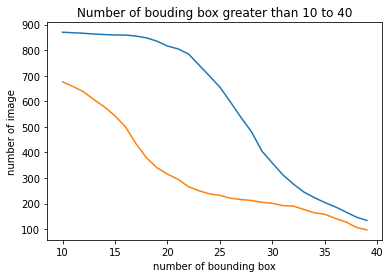

In [5]:
plt.plot(range(10,40),bb_ads,label="demo",)
plt.plot(range(10,40),bb_non_ads)
plt.title("Number of bouding box greater than 10 to 40")
plt.xlabel("number of bounding box")
plt.ylabel("number of image")

Get 10 bouding box - 5 greatest and 5 smallest

Get height and width of image

In [6]:
img_ads_path = "../data/dataset/training_data/ads"
img_non_ads_path = "../data/dataset/training_data/non_ads"
hw_ads = [PIL.Image.open(img_ads_path + "/" + name[:-3] + "png").size for name in f if 'ads' == name[:3]]
hw_non_ads = [PIL.Image.open(img_non_ads_path +"/"+ name[:-3] + "png").size for name in f if 'ads' != name[:3]]


Set weight of images

$$x = max(H_b/W_b) +...+ max ((|H_cb-H_c+1)(|W_cb-W_c+1))$$

In [7]:
def extract_info(arr):
    arr = [int(i) for i in arr.split(",")[:-1]]
    h_b = arr[-1]-arr[1]
    w_b = arr[2] - arr[0]
    h_cb = (arr[-1]+arr[1])//2
    w_cb = (arr[2]+arr[0])//2
    return h_b,w_b,h_cb,w_cb

In [36]:
def sort_weight(bb, temp_scale,temp_distance):
    temp_scale_sort = sorted(temp_scale)
    temp_distance_sort = sorted(temp_distance)
    bb_t = []
    return bb_t,temp_scale_sort[-n_att:] + temp_distance_sort[-n_att:]


In [9]:
extract_info(ads_data[0][0])

(25, 192, 344, 608)

### Save weight as csv file

In [26]:
import pandas as pd

In [30]:
data_scale = []
data_distance = []

In [40]:
n_att = 10
w_ads = []
ads_name_filted =[]
for name,bbs,hw in zip(ads_name,ads_data,hw_ads):
    if len(bbs) <n_att:
        continue
    temp_scale = []
    temp_distance = []
    for bb in bbs:
        h_b,w_b,h_cb,w_cb =extract_info(bb)
        weight = (3*h_b*(abs(h_cb-hw[1])+1)*(abs(w_cb-hw[0])+1))/w_b
        # save data of weight
        data_scale.append(h_b/w_b)
        data_distance.append((abs(h_cb-hw[1])+1)*(abs(w_cb-hw[0])+1))
        # append weight
        temp_scale.append(h_b/w_b*1000000)
        temp_distance.append((abs(h_cb-hw[1])+1)*(abs(w_cb-hw[0])+1))
    bb_t, w_t = sort_weight(bbs, temp_scale,temp_distance)
    ads_name_filted.append([name, bb_t])
    w_ads.append(w_t)
    # w_ads.append(temp[:5] + temp[-5:])
w_non_ads = []
non_ads_name_filted = []
for name,bbs,hw in zip(non_ads_name,non_ads_data,hw_non_ads):
    if len(bbs) <n_att:
        continue
    temp_scale = []
    temp_distance = []
    for bb in bbs:
        h_b,w_b,h_cb,w_cb =extract_info(bb)
        weight = (3*h_b*(abs(h_cb-hw[1])+1)*(abs(w_cb-hw[0])+1))/w_b
        # save data of weight
        data_scale.append(h_b/w_b)
        data_distance.append((abs(h_cb-hw[1])+1)*(abs(w_cb-hw[0])+1))
        # append weight
        temp_scale.append(h_b/w_b*1000000)
        temp_distance.append((abs(h_cb-hw[1])+1)*(abs(w_cb-hw[0])+1))
    bb_t, w_t = sort_weight(bbs, temp_scale,temp_distance)
    non_ads_name_filted.append([name, bb_t])
    w_non_ads.append(w_t)
    # temp = sorted(temp)
    # w_non_ads.append(temp[:5] + temp[-5:])


In [41]:
w_ads[0]

[130208.33333333334,
 133928.57142857142,
 135416.66666666666,
 136363.63636363635,
 142857.14285714284,
 145833.33333333334,
 214285.71428571426,
 229166.66666666666,
 333333.3333333333,
 476562.5,
 253721,
 274443,
 461461,
 463603,
 503174,
 522732,
 580290,
 587323,
 664128,
 801090]

## Show seleted bounding box
* Green bounding box: discarded bouding box 
* Red bouding box: selected bouding box

In [22]:
import cv2
import matplotlib.pyplot as plt

In [23]:
ctpn_path = "../data/dataset/ctpn_output/testing_data/"
image_ads_path = "../data/dataset/training_data/ads/"
image_non_ads_path = "../data/dataset/training_data/non_ads/"
store_path = "./image_bounding_box/"

In [24]:
def resize_image(img):
    img_size = img.shape
    im_size_min = np.min(img_size[0:2])
    im_size_max = np.max(img_size[0:2])

    im_scale = float(600) / float(im_size_min)
    if np.round(im_scale * im_size_max) > 1200:
        im_scale = float(1200) / float(im_size_max)
    new_h = int(img_size[0] * im_scale)
    new_w = int(img_size[1] * im_scale)

    new_h = new_h if new_h // 16 == 0 else (new_h // 16 + 1) * 16
    new_w = new_w if new_w // 16 == 0 else (new_w // 16 + 1) * 16

    re_im = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
    return re_im, (new_h / img_size[0], new_w / img_size[1])
def draw_boudingbox(img,all_bb,red_bb):
    img, (rh, rw) = resize_image(img)
    for bb in all_bb:
        if bb in red_bb:
            bb_list = np.array([int(b) for b in bb.split(",")[:-1]])
            cv2.polylines(img, [bb_list[:8].astype(np.int32).reshape((-1, 1, 2))], True, color=(0, 0, 255),
                                  thickness=2)
        else:
            bb_list = np.array([int(b) for b in bb.split(",")[:-1]])
            cv2.polylines(img, [bb_list[:8].astype(np.int32).reshape((-1, 1, 2))], True, color=(0, 255, 0),thickness=2)
    img = cv2.resize(img, None, None, fx=1.0 / rh, fy=1.0 / rw, interpolation=cv2.INTER_LINEAR)
    return img
def show_image(n_img, img_name):
    for i in range(n_img):
        if "ads" == img_name[i][0][:3]:
            all_bb = ads_data[ads_name.index(img_name[i][0])]
            img = cv2.imread(image_ads_path+img_name[i][0][:-3] + "png")
        else:
            all_bb = non_ads_data[non_ads_name.index(img_name[i][0])]
            img = cv2.imread(image_non_ads_path+img_name[i][0][:-3] + "png")
        img = draw_boudingbox(img,all_bb,img_name[i][1])
        cv2.imwrite(store_path + img_name[i][0][:-3] + "png", img)

In [25]:
show_image(20,ads_name_filted)
show_image(20,non_ads_name_filted)

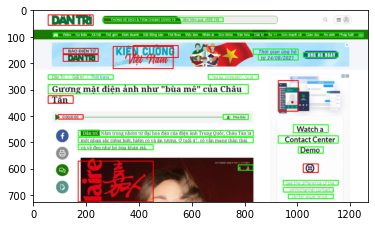

In [127]:
plt.imshow(img[:,:,::-1])

In [43]:
X = w_ads + w_non_ads
y = [0]*len(w_ads) + [1]*len(w_non_ads)


# Using Neural Netwwork

In [30]:
from keras.models import Sequential
from keras.layers import Dense

In [31]:
# define the keras model
model =Sequential()
model.add(Dense(16, input_dim=n_att, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.fit(X,y,epochs=10,batch_size=10)

Epoch 1/10
222/222 [==============================] - 1s 1ms/step - loss: 587.8297 - accuracy: 0.4932
Epoch 2/10
222/222 [==============================] - 0s 1ms/step - loss: 126.4844 - accuracy: 0.5221
Epoch 3/10
222/222 [==============================] - 0s 1ms/step - loss: 71.6799 - accuracy: 0.5284
Epoch 4/10
222/222 [==============================] - 0s 1ms/step - loss: 59.4030 - accuracy: 0.5131
Epoch 5/10
222/222 [==============================] - 0s 1ms/step - loss: 43.8039 - accuracy: 0.5086
Epoch 6/10
222/222 [==============================] - 0s 1ms/step - loss: 19.2368 - accuracy: 0.5261
Epoch 7/10
222/222 [==============================] - 0s 1ms/step - loss: 17.0076 - accuracy: 0.5122
Epoch 8/10
222/222 [==============================] - 0s 2ms/step - loss: 19.1769 - accuracy: 0.5054
Epoch 9/10
222/222 [==============================] - 0s 2ms/step - loss: 25.0327 - accuracy: 0.5257
Epoch 10/10
222/222 [==============================] - 0s 1ms/step - loss: 8.6387 - accur

In [35]:
predictions = model.predict(X[:5])
# summarize the first 5 cases
# for i in range(5):
# 	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

In [37]:
print("{}/{}".format(sum(predictions < 0.5)[0], len(predictions)))
print(sum(y[:5]))

5/5
0


#   Using SVM

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import sklearn.metrics as metrics

In [44]:
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [45]:
clf = SVC(C=1.0, kernel='rbf', probability=True).fit(X_train,y_train)
clf.probability = True

In [46]:
len(X_train)

1086

In [47]:
y_pred = clf.predict(X_test)

In [48]:
metrics.confusion_matrix(y_test,y_pred)

array([[228,  11],
       [ 12, 215]], dtype=int64)

In [49]:
metrics.accuracy_score(y_test,y_pred)

0.9506437768240343

## Save SVM support vectors

In [35]:
import joblib

In [36]:
joblib.dump(clf, "svm_phase_1.pkl")

['svm_phase_1.pkl']

## Load SVM by joblid

In [37]:
clf2 = joblib.load("svm_phase_1.pkl")

In [38]:
r = clf2.predict(X_test)

In [39]:
metrics.confusion_matrix(y_test, r)

array([[209,  42],
       [ 36, 179]], dtype=int64)